# DS-SF-32 | Homework 02: The `pandas` Library

In this homework, we will be exploring the `police shootings` dataset using `pandas`.

In [2]:
import pandas as pd
import os 

In [5]:
killings = pd.read_csv(os.path.join('..', '..', 'DS-SF-32', 'dataset', 'police-killings.csv'))
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


#### A) Starter question: Display a few lines of the dataset to the screen.

In [6]:
df = killings.copy()
df.head(3)

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930



#### 1. Make the following changed to column names:

+ lawenforcementagency -> agency
+ raceethnicity        -> race


In [39]:
col_names = df.columns.values
col_names[4] = 'race'
col_names[11] = 'agency'
# print col_names
df.columns = col_names
df.head(2)

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930



#### 2. Show the count of missing values in each column


In [61]:
df.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

#### 3. replace each null value in the dataframe with the string "Unknown"

In [40]:
e = df.copy()
e.fillna('Unknown')
e.head()

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


#### 4. How many killings were there so far in 2015?

In [41]:
e[e['year']==2015].shape[0]

467

#### 5. Of all killings, how many were male and how many female?

In [42]:
e.groupby('gender').size()

gender
Female     22
Male      445
dtype: int64

#### 6. How many killings were of unarmed people?


In [43]:
num_unarmed = e[e['armed']=='No'].shape[0]
print num_unarmed

102


#### 7. What percentage of all killings were unarmed?


In [44]:
float(100*num_unarmed)/len(e)

21.841541755888652

#### 8. What are the 5 states with the most killings?


In [45]:
e.groupby('state').count()['Unnamed: 0'].sort_values(ascending=False)[:5].index.tolist()



['CA', 'TX', 'FL', 'AZ', 'OK']

#### 9. Show a value counts of deaths for each race


In [35]:
df

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669
5,5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,Phoenix Police Department,Gunshot,No,53596
6,6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,Bakersfield Police Department,Gunshot,Firearm,48552
7,7,Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,Los Angeles Police Department,Gunshot,Non-lethal firearm,55909
8,8,Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,Wise County Sheriff's Department and Texas DPS,Gunshot,Firearm,38310
9,9,Alan James,31,Male,White,February,7,2015,200 Abbie St SE,Wyoming,MI,Kentwood Police Department and Wyoming DPS,Gunshot,Other,51667


#### 10. Display a histogram of ages of all killings


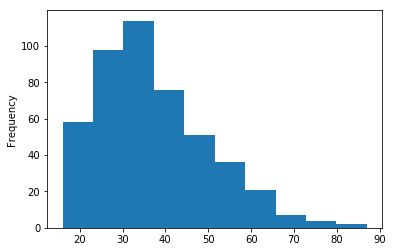

In [36]:
%matplotlib inline
df['age'].plot.hist()

#### 11. Show 6 histograms of ages by race


['Black' 'White' 'Hispanic/Latino' 'Unknown' 'Asian/Pacific Islander'
 'Native American']


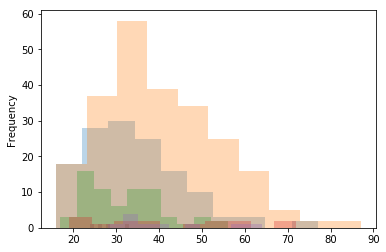

In [76]:
print e['race'].unique()
for r in e['race'].unique():
    e[e['race']==r]['age'].plot.hist(alpha=0.30, label=r)

# matplotlib.pyplot.hist([[e[e['race']==r]['age'] for r in e['race'].unique() x, bins=None, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)
    

#### 12. What is the average age of death by race?


In [56]:
mean_death_ages = e.groupby('race')['ages']

KeyError: 'Column not found: ages'

#### 13. Show a bar chart with counts of deaths every month


In [144]:
# mean_death_ages.plot()